<center><h1>Prediction using Decision Tree Algorithm</h1></center>
<center><h2>Mohammad Yousha</h2></center>
<center><h3>GRIP Task 6</h3></center>

___

**Sections:**
1. [Visualizing The Data](#Visualizing-The-Data)
2. [Preprocessing Data and Model Training](#Preprocessing-Data-and-Model-Training)
3. [Tuning and Evaluating The Model](#Tuning-and-Evaluating-The-Model)
4. [Visualizing The Model](#Visualizing-The-model)
5. [Predicting New Data](#Predicting-New-Data)

In [2]:
import numpy as no
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.columns = ['id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

Renaming the column names for better effeciency and readability.

In [6]:
df.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Visualizing The Data

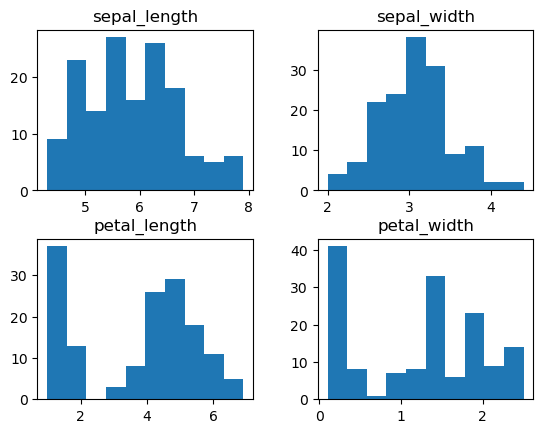

In [91]:
df.drop('id', inplace=True, axis=1)
df.hist(grid=False)
plt.show()

**Observation:** Sepal length and width are normally distributed, while petal length and width are not. **This could indicate that sepal length has more patterns.**

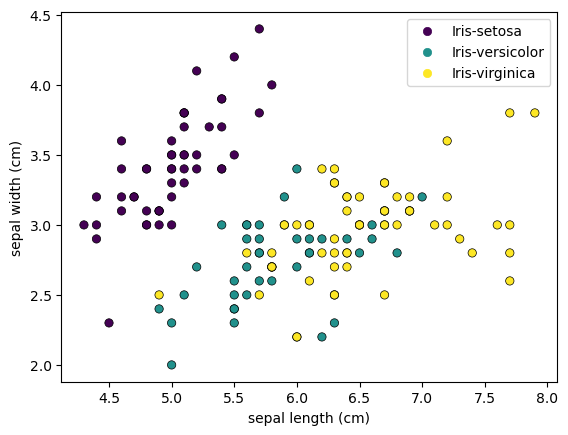

In [29]:
species_dict = {'Iris-setosa': 0,
'Iris-versicolor': 1,
'Iris-virginica': 2}

colors = [species_dict[item] for item in df['species']]

scatter = plt.scatter(df['sepal_length'], df['sepal_width'], c = colors, edgecolor='black',linewidths=.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.legend(handles=scatter.legend_elements()[0],
labels = species_dict.keys())
plt.show()

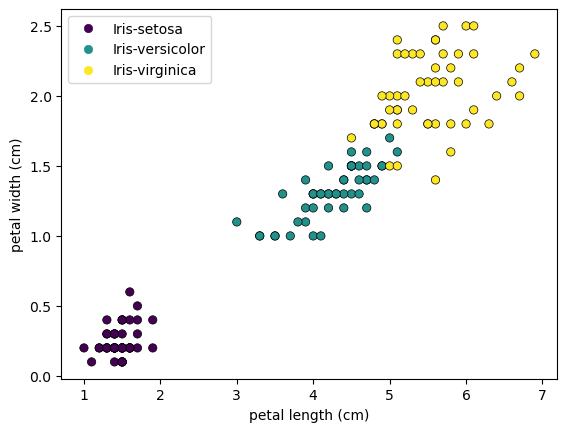

In [30]:
species_dict = {'Iris-setosa': 0,
'Iris-versicolor': 1,
'Iris-virginica': 2}

colors = [species_dict[item] for item in df['species']]

scatter = plt.scatter(df['petal_length'], df['petal_width'], c = colors, edgecolor='black',linewidths=.5)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.legend(handles=scatter.legend_elements()[0],
labels = species_dict.keys())
plt.show()

**Observation:** *Iris Setosa* is distinct. *Iris Versicolor* and *Iris Virginica* have a lot of overlap between their features. **This could indicate that the model will have a harder time deciding between Iris Setosa and Iris Virginica.**

# Preprocessing Data and Model Training

In [39]:
X = df.drop('species', axis=1)
y = df.species.values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0, stratify=y)

**Stratification** is important here:

In [42]:
pd.Series(y_train).value_counts()

Iris-setosa        40
Iris-versicolor    40
Iris-virginica     40
dtype: int64

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dc = DecisionTreeClassifier()

dc.fit(X_train, y_train)
pred = dc.predict(X_test)

In [47]:
dc.score(X_test, y_test)

0.9666666666666667

The base model has an accuracy of around **96.67**. Let's see if it can be improved by tuning the hyperparameters.

# Tuning and Evaluating The Model

Let's find the optimal value for **max_depth**. The optimal value will be where **accuracy is highest for both sets**, to prevent overtraining.

In [124]:
depth = []
test_accuracy = []
train_accuracy = []

for max_d in range(1,20):
    model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model.fit(X_train, y_train)
    depth.append(max_d)
    train_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

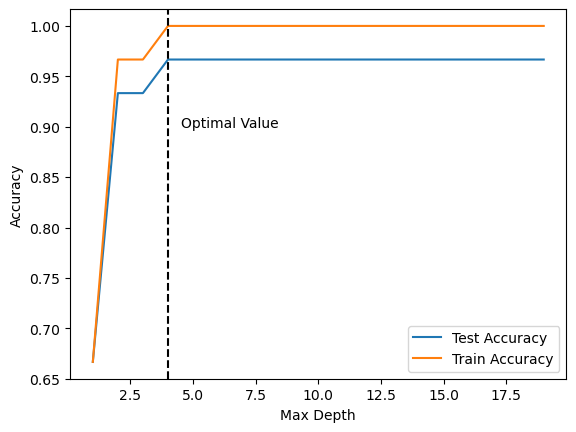

In [83]:
plt.plot(depth, test_accuracy, label = 'Test Accuracy')
plt.plot(depth, train_accuracy, label = 'Train Accuracy')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=4, color='black', linestyle='--')
plt.text(4.5, 0.90, 'Optimal Value')
plt.show()

In [65]:
leaves = []
test_accuracy = []
train_accuracy = []

for max_f in range(2,20):
    model = DecisionTreeClassifier(max_leaf_nodes=max_f, random_state=42)
    model.fit(X_train, y_train)
    leaves.append(max_f)
    train_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

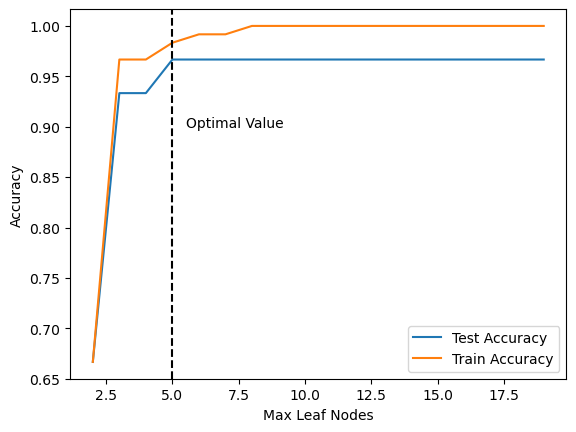

In [77]:
plt.plot(leaves, test_accuracy, label = 'Test Accuracy')
plt.plot(leaves, train_accuracy, label = 'Train Accuracy')
plt.xlabel("Max Leaf Nodes")
plt.ylabel("Accuracy")
plt.legend()
plt.axvline(x=5, color='black', linestyle='--')
plt.text(5.5, 0.90, 'Optimal Value')
plt.show()

**Observation:** The accuracy went higher for the training set, but not for the test set. **This indicates that the model started overtraining.** So, we will only take the value from the point where test accuracy started plateauing.

In [92]:
dc_tuned = DecisionTreeClassifier(max_depth = 4, max_leaf_nodes = 5) # Optimal training values

dc_tuned.fit(X_train, y_train)
pred = dc_tuned.predict(X_test)

dc_tuned.score(X_test, y_test)

0.9666666666666667

**Observation:** There isn't any improvement in our tuned model. But that is fine, what is importan is trying and testing different things that could work.

Plotting a confusion matrix:

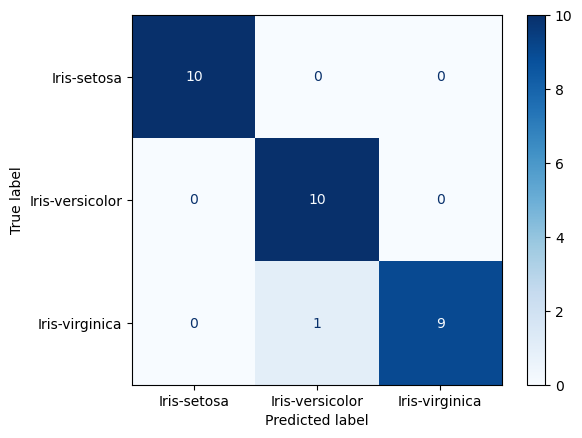

In [125]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dc_tuned, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

**Observation:** Just as we predicted earlier, the model had difficulties deciding between *Iris Versicolor* and *Iris Virginica*.

# Visualizing The Model

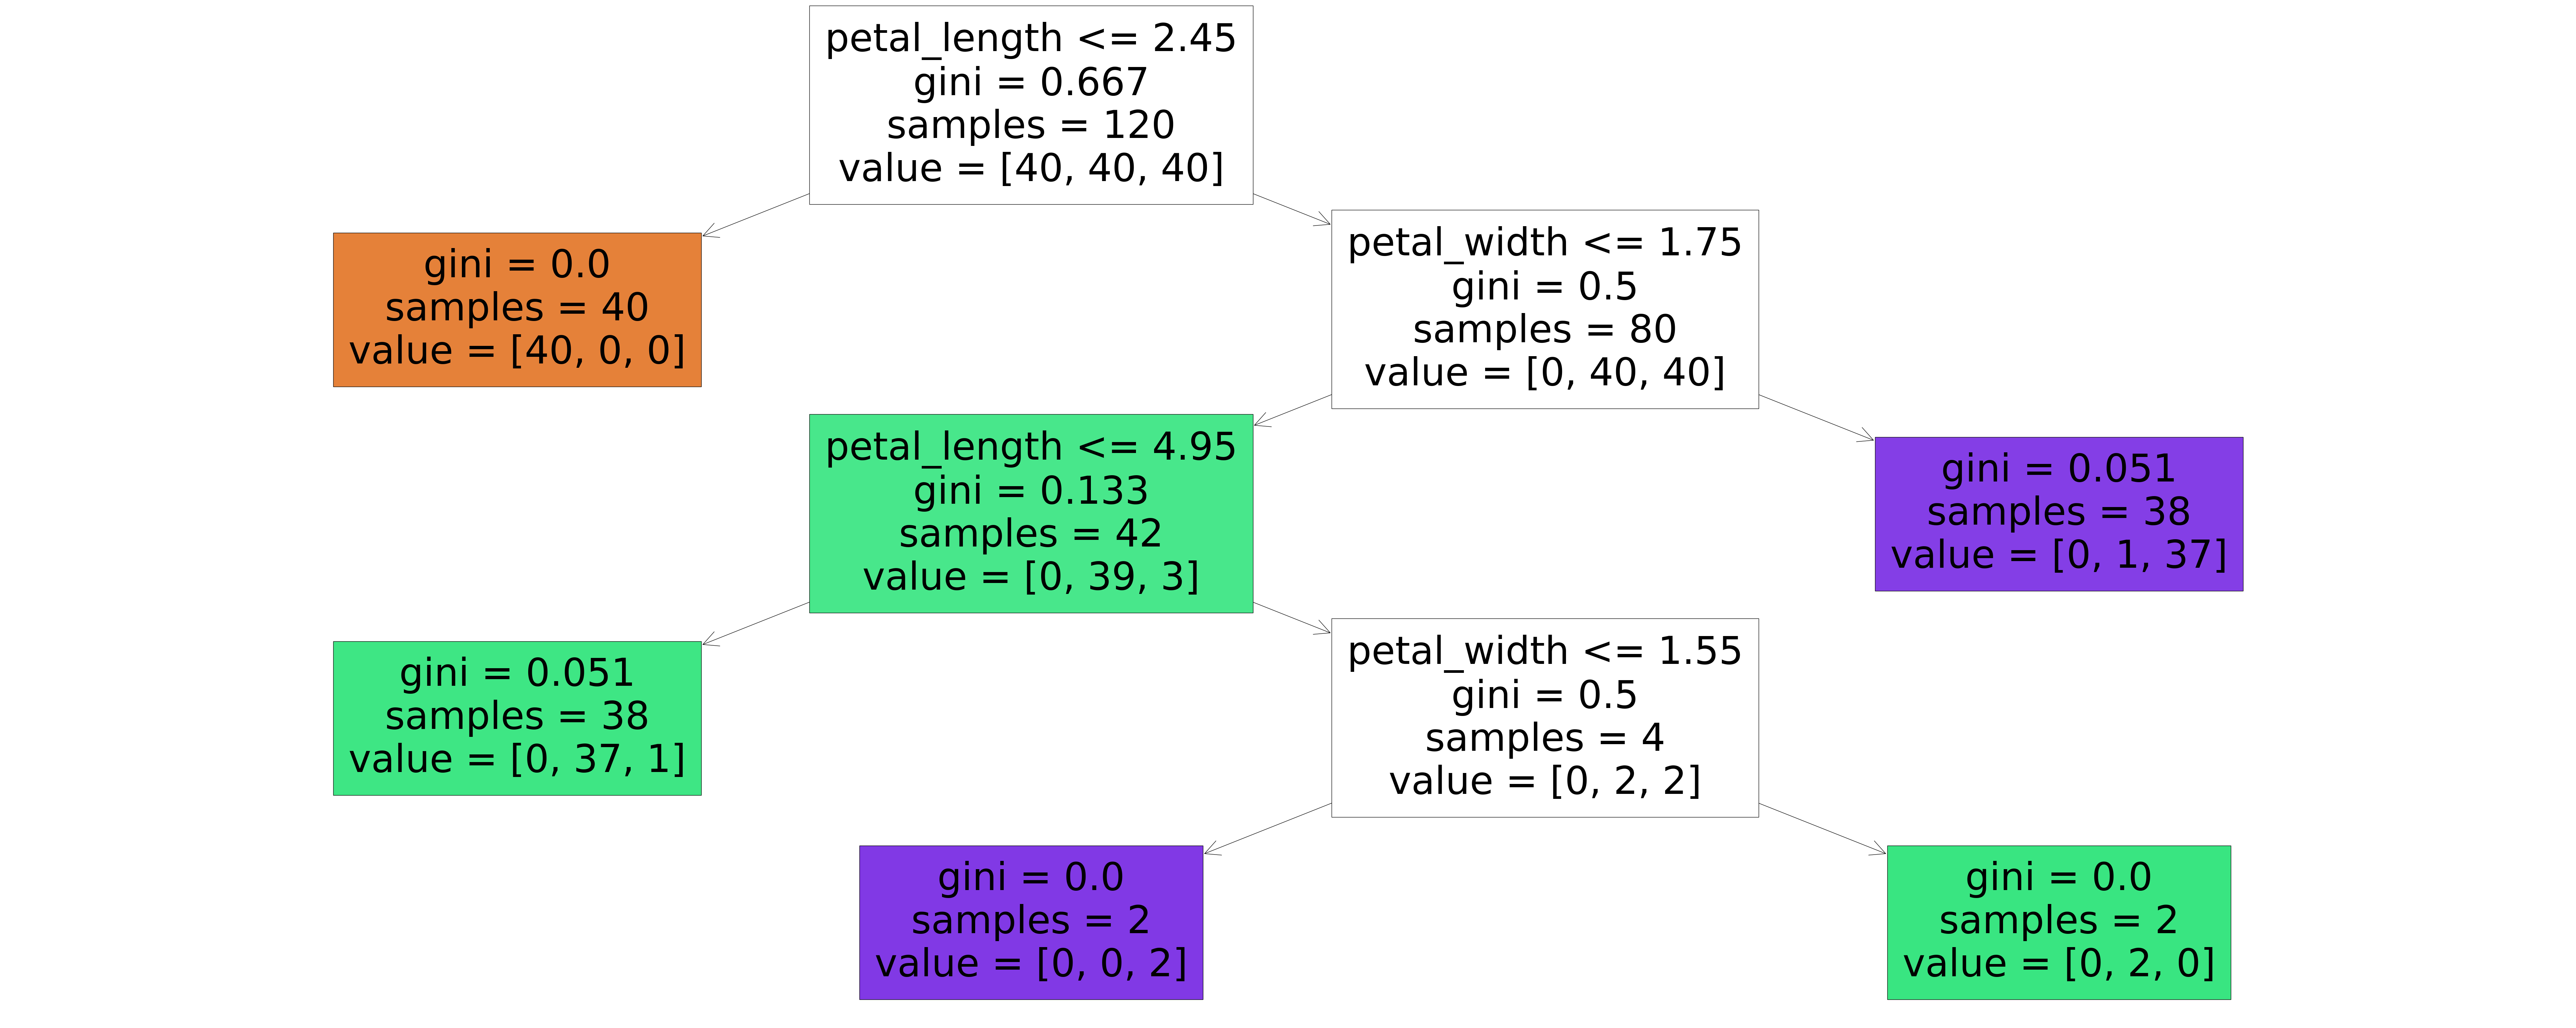

In [127]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(100,40))

plot_tree(dc_tuned, feature_names=X_train.columns, max_depth=4, filled=True)
plt.show()

# Predicting New Data

Let's predict the species of an un-labeled flower. It can be given any reasonable measurements.

In [119]:
new_data = pd.DataFrame([{'sepal_length': 6.0, 'sepal_width': 4, 'petal_length':2.5, 'petal_width':0.3}])

In [121]:
new_data

,sepal_length,sepal_width,petal_length,petal_width
0,6.0,4,2.5,0.3


Now, according to our visualization of the model, this is how the species will be predicted:

1. Is the petal_length **smaller than or equal to 2.45**? **No**. We can see that it is **2.5**. So we will go to the **right node**.
2. Is the petal_width **smaller than or equal to 1.75**? **Yes**. We can see that it is **0.3**. So, we will go to the **left node**.
3. Is the petal_length **smaller than or equal to 4.95? **Yes**. It is **2.5**. So, we will go to the **left node**.

**values = [0, 37, 1]** refers to the numbers of the species classified as **[Iris Setosa, Iris Versicolor, Iris Virginica]**. 

So, this should be an **Iris Versicolor**.

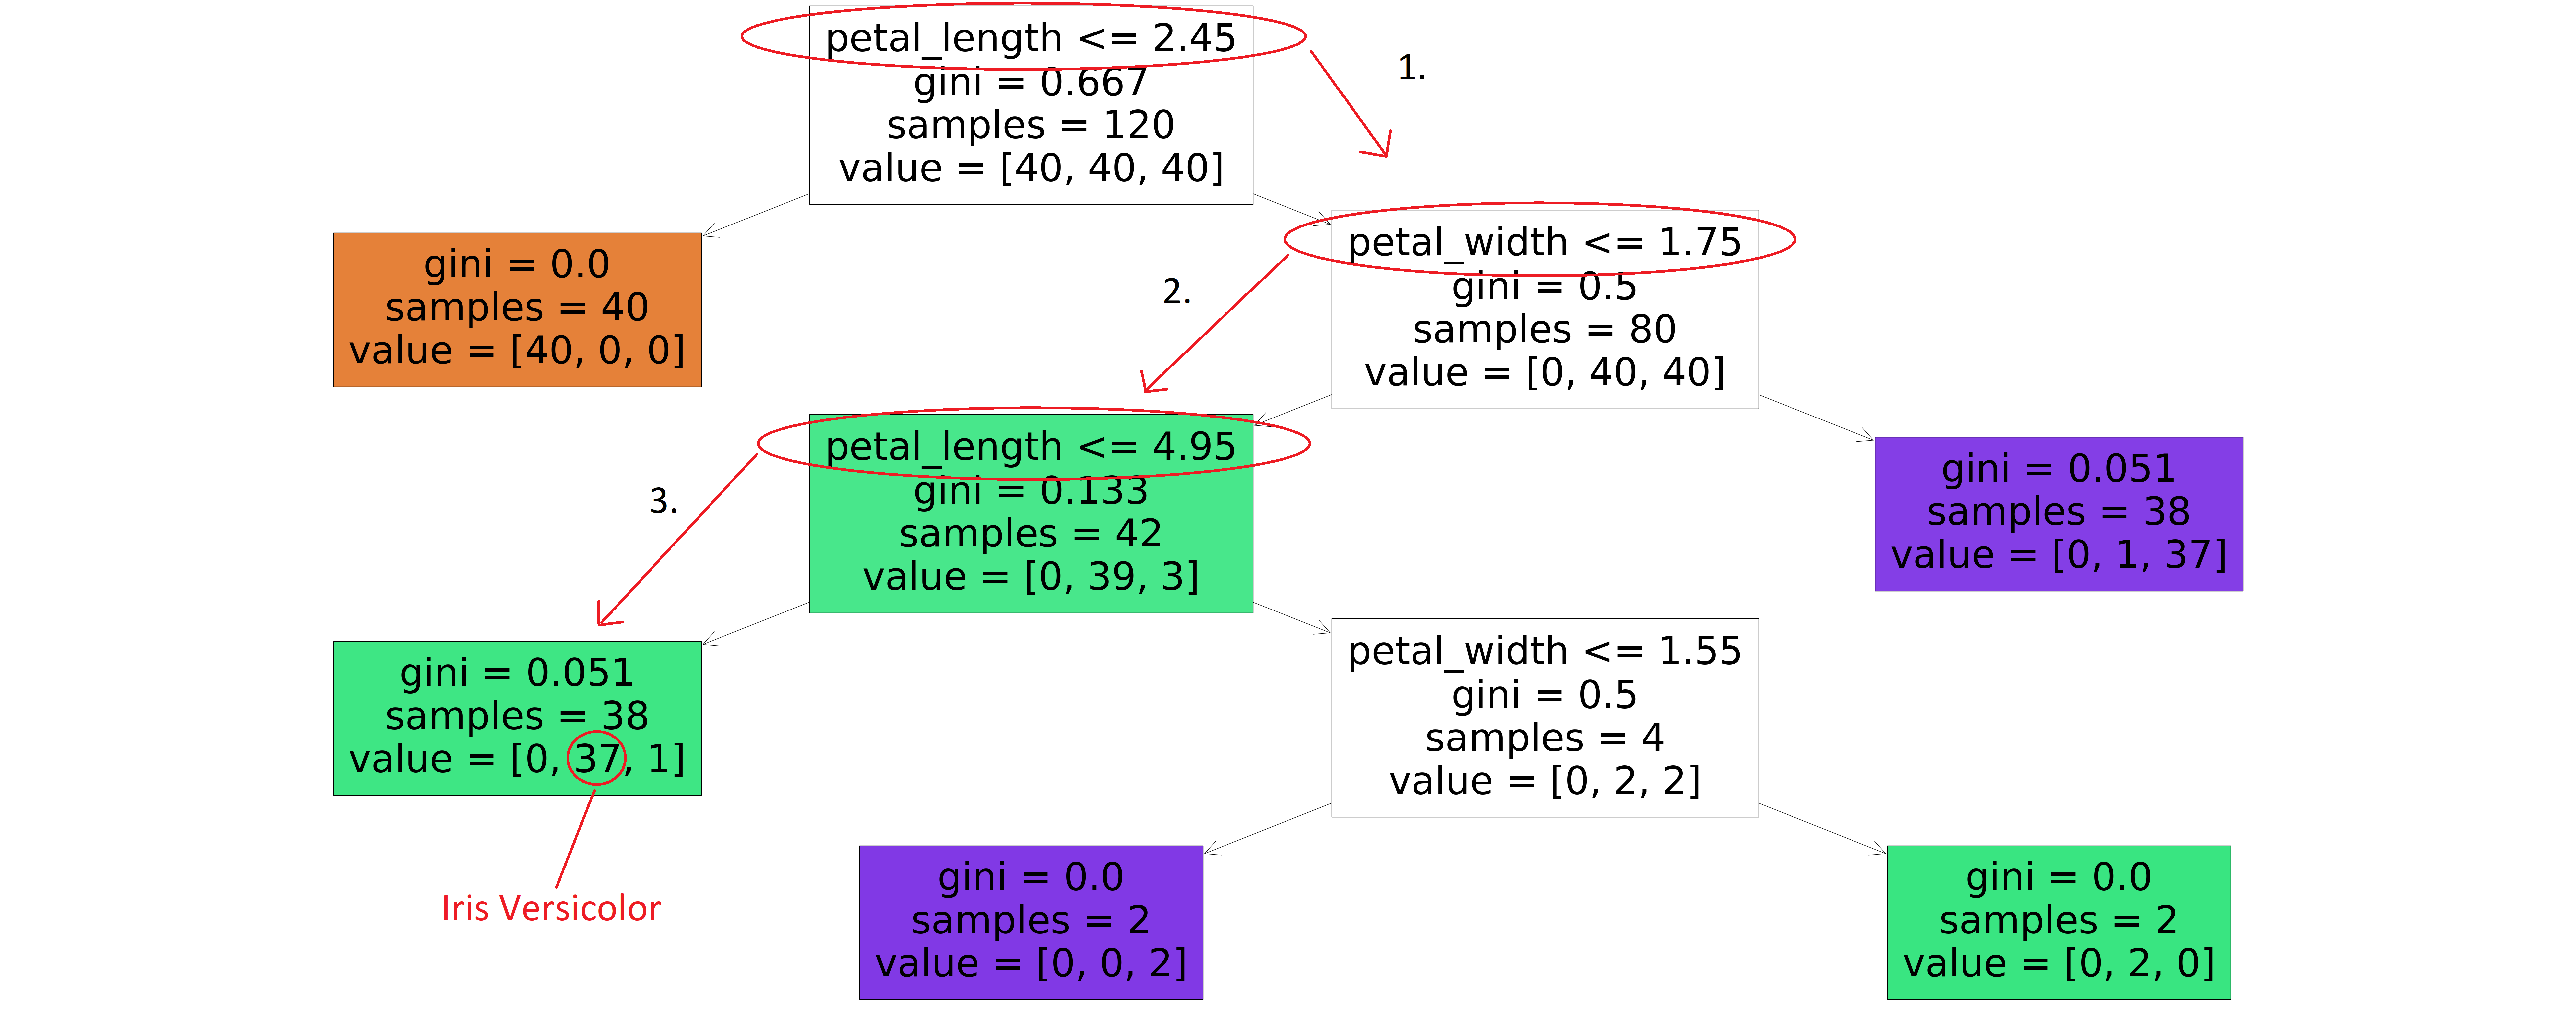

In [122]:
new_prediction = dc_tuned.predict(new_data)

print(new_prediction)

['Iris-versicolor']


We were correct!